In [1]:
%load_ext google.cloud.bigquery

In [6]:
%%bigquery total_birth
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [9]:
%matplotlib inline

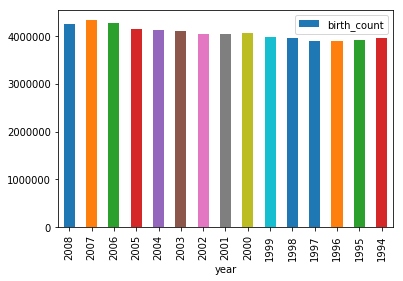

In [10]:
total_birth.plot(kind = 'bar', x = 'year', y = 'birth_count')

In [14]:
%%bigquery births_by_weekday
SELECT 
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_birth,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_birth
FROM `bigquery-public-data.samples.natality`
WHERE wkday is NOT NULL
GROUP BY wday
ORDER BY wday ASC

,wday,male_birth,female_birth
0,NaN,28986916,27558410
1,1.0,4293575,4093357
2,2.0,6095840,5831111
3,3.0,6727217,6412155
4,4.0,6618729,6307782
5,5.0,6583015,6284434
6,6.0,6518636,6223584
7,7.0,4761950,4530052


In [18]:
births_by_weekday_no_null = births_by_weekday[1:]

In [21]:
births_by_weekday_no_null = births_by_weekday_no_null.reset_index()

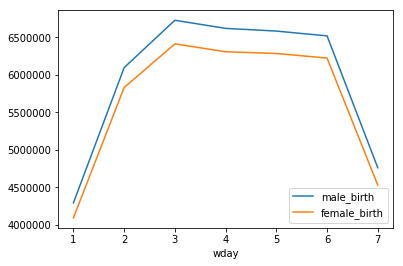

In [25]:
births_by_weekday_no_null.plot(x = 'wday', y =['male_birth','female_birth'])

In [26]:
from google.cloud import bigquery
client = bigquery.Client()

In [28]:
sql = """
SELECT 
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality>1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


In [29]:
pivot_table = df.pivot(index = 'year', columns = 'plurality', values = 'count')

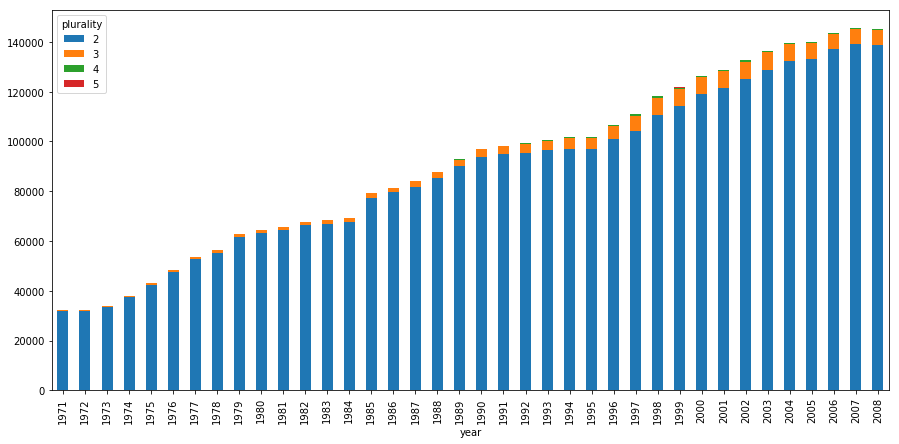

In [34]:
pivot_table.plot(kind = 'bar', stacked = 'True', figsize=(15,7))

In [35]:
sql = """
SELECT
    gestation_weeks,
    COUNT(*) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

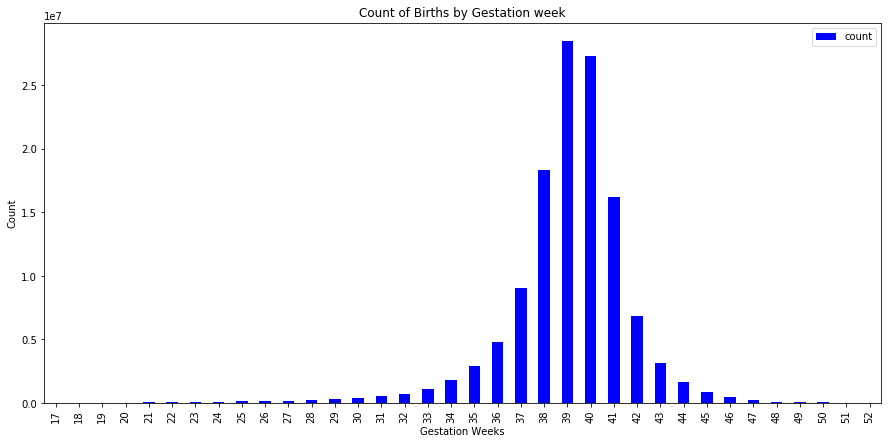

In [47]:
ax = df.plot(kind = 'bar', x = 'gestation_weeks', y = 'count', color = 'blue', figsize=(15,7))
ax.set_title('Count of Births by Gestation week')
ax.set_xlabel('Gestation Weeks')
ax.set_ylabel('Count');